In [104]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [105]:
# Загрузка датасета
data = datasets.load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [106]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [107]:
X = data.data
y = data.target

In [108]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=678)

In [109]:
# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

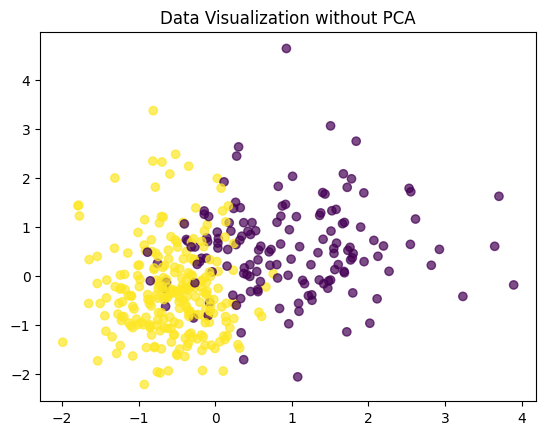

In [110]:
plt.figure()
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, alpha=0.7)
plt.title('Data Visualization without PCA')
plt.show()

In [111]:
# Обучение логистической регрессии
log_reg = LogisticRegression(max_iter=100000, solver='newton-cg')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=100000, solver='newton-cg')

In [112]:
# Оценка точности модели до применения PCA
y_pred_before_pca = log_reg.predict(X_test_scaled)

accuracy_before_pca = accuracy_score(y_test, y_pred_before_pca)
print("Точность до применения PCA:", accuracy_before_pca)

Точность до применения PCA: 0.9883040935672515


In [113]:
# Применение метода главных компонент
pca = PCA(n_components=3)  # Выбираем количество главных компонент
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

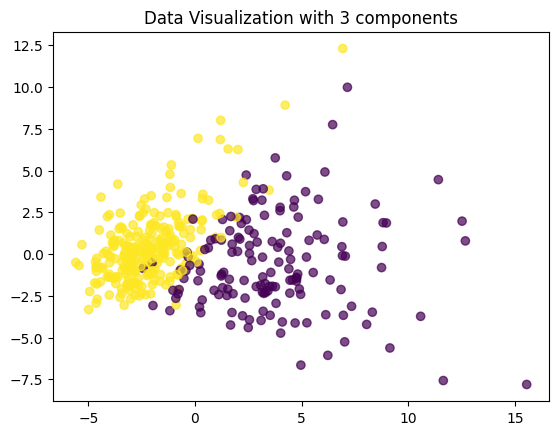

In [114]:
plt.figure()
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, alpha=0.7)
plt.title('Data Visualization with 3 components')
plt.show()

In [115]:
# Обучение логистической регрессии на данных после применения PCA
log_reg_pca = LogisticRegression(max_iter=100000, solver='newton-cg')
log_reg_pca.fit(X_train_pca, y_train)

LogisticRegression(max_iter=100000, solver='newton-cg')

In [116]:
# Оценка точности модели после применения PCA
y_pred_after_pca = log_reg_pca.predict(X_test_pca)
accuracy_after_pca = accuracy_score(y_test, y_pred_after_pca)
print("Точность после применения PCA:", accuracy_after_pca)

Точность после применения PCA: 0.9473684210526315


In [117]:
# Применение метода главных компонент
pca_10 = PCA(n_components=10)  # Выбираем количество главных компонент
X_train_pca_10 = pca_10.fit_transform(X_train_scaled)
X_test_pca_10 = pca_10.transform(X_test_scaled)

# Обучение логистической регрессии на данных после применения PCA
log_reg_pca_10 = LogisticRegression(max_iter=100000, solver='newton-cg')
log_reg_pca_10.fit(X_train_pca_10, y_train)

# Оценка точности модели после применения PCA
y_pred_after_pca_10 = log_reg_pca_10.predict(X_test_pca_10)
accuracy_after_pca_10 = accuracy_score(y_test, y_pred_after_pca_10)
print("Точность после применения PCA:", accuracy_after_pca_10)

Точность после применения PCA: 0.9941520467836257


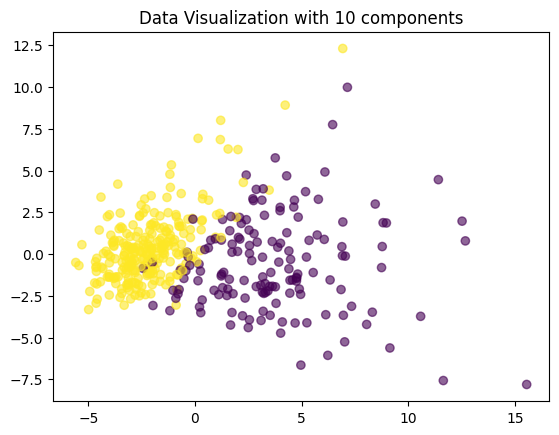

In [118]:
plt.figure()
plt.scatter(X_train_pca_10[:, 0], X_train_pca_10[:, 1], c=y_train, alpha=0.6)
plt.title('Data Visualization with 10 components')
plt.show()